In [104]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize
import scipy.stats as stats


In [2]:
def deltat(time,ch1,ch2):
    half1= max(ch1)/2
    half2= max(ch2)/2
    i=0
    while ch1[i]<half1:
        i=i+1
    j=0
    while ch2[j]<half2:
        j=j+1
    t1= time[i]
    t2= time[j]
    dt= time[j]-time[i]
    return dt, t1 ,t2

def tot(time, ch):
    half= max(ch)/2
    i=0
    while ch[i]<half:
        i=i+1
    j=i+30
    while ch[j]>half:
        j=j+1
    tott= time[j]-time[i]
    return tott

In [3]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/scan_L2_2V_A2_0V/*")

a= sorted(a)


In [4]:
temp=[]
for i in range(3):
    f= h5py.File(a[i])
    temp.append(f)

In [5]:
print(temp[1])

<HDF5 file "20220929-144918_1.h5" (mode r)>


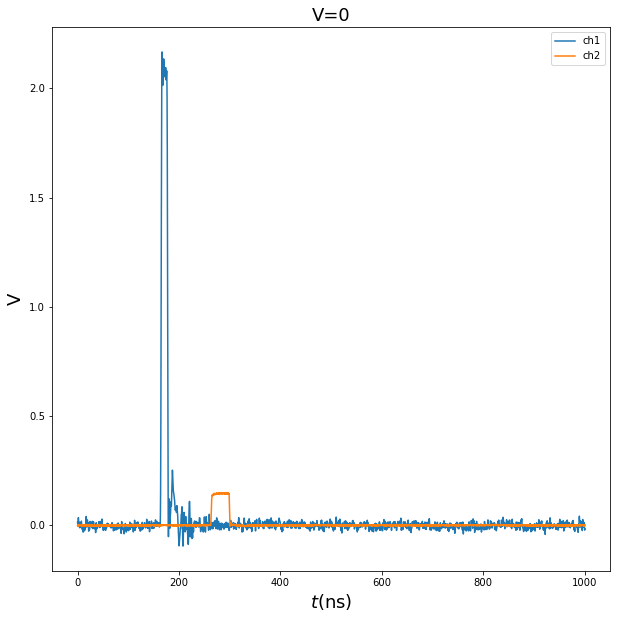

In [6]:
dset= temp[1]['Waveforms']
ch1= dset["Channel 1"]
ch1= ch1["Channel 1Data"]
ch1= np.array(ch1)
ch2= dset["Channel 2"]
ch2= ch2["Channel 2Data"]
ch2= np.array(ch2)


arr= np.linspace(0,((1/(16*10**9))*16001)*10**9, 16001)

fig = plt.figure(figsize=(10,10))
plt.plot(arr,ch1, label="ch1")
plt.plot(arr,ch2, label="ch2")


plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("V=0",fontsize=18)
plt.ylabel("V",fontsize=18)
plt.show()

In [7]:
%%time

pixelnames=[]
temp=[]
for i in range(len(a)):
    if i==0:
        temp.append(a[i])
    elif a[i]==a[-1]:
        temp.append(a[i])
        pixelnames.append(temp)
    elif a[i][88:94]==a[i-1][88:94]:
        temp.append(a[i])
    else:
        pixelnames.append(temp)
        temp=[]
        temp.append(a[i])

CPU times: user 56.2 ms, sys: 0 ns, total: 56.2 ms
Wall time: 56.2 ms


In [8]:
%%time
pixelsdt=[]
pixelstot=[]
time= np.linspace(0,((1/(16*10**9))*16001)*10**9, 16001)

for i in range(len(pixelnames)):
    temp2=[]
    temp3=[]
    for j in range(len(pixelnames[i])):
        temp1=h5py.File(pixelnames[i][j])
        temps=temp1["Waveforms"]
        ch1= temps["Channel 1"]
        ch1= ch1["Channel 1Data"]
        ch1= np.array(ch1)
        ch2= temps["Channel 2"]
        ch2= ch2["Channel 2Data"]
        ch2= np.array(ch2)
        dt,t2,t3 =deltat(time,ch1,ch2)
        temp2.append(dt)
        temp3.append(tot(time,ch2))
        temp1.close()
    pixelsdt.append(temp2)
    pixelstot.append(temp3)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
CPU times: user 30min 4s, sys: 9.99 s, total: 30min 14s
Wall time: 30min 23s


In [9]:
print(len(pixelsdt[1]))
print(len(pixelstot[1]))

1631
1631


In [10]:
test=np.arange(0,64)

In [11]:
test2= np.reshape(test,(8,8))
test2

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

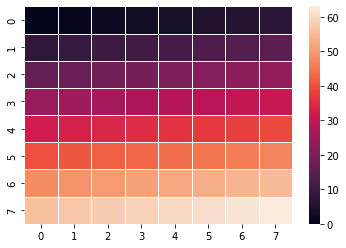

In [12]:
ax = sns.heatmap(test2, linewidth=0.5)


plt.show()

In [13]:
mintot=[]
for i in range(len(pixelstot)):
    mins= min(pixelstot[i])
    mintot.append(mins)

In [14]:
min(mintot)

20.626289062500007

In [15]:
sig=[]
tot2=[]
for i in range(len(pixelstot)):
    mean= np.mean(pixelstot[i])
    sigs= np.std(pixelsdt[i])
    tot2.append(mean)
    sig.append(sigs*1000)

In [16]:
sigmap= np.reshape(sig,(8,8))
totmap= np.reshape(tot2,(8,8))

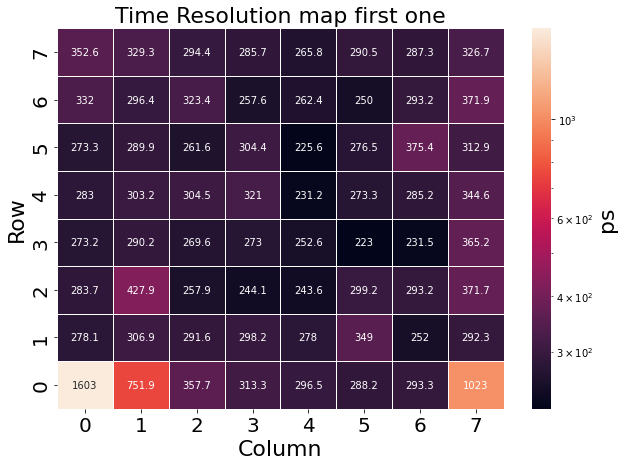

In [17]:
plt.figure(figsize = (10,7))
plt.title('Time Resolution map first one',fontsize=22)
ax=sns.heatmap(sigmap, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.4g')
ax.collections[0].colorbar.set_label("ps",fontsize=22)
plt.xlabel("Column",fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Row',fontsize=22)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

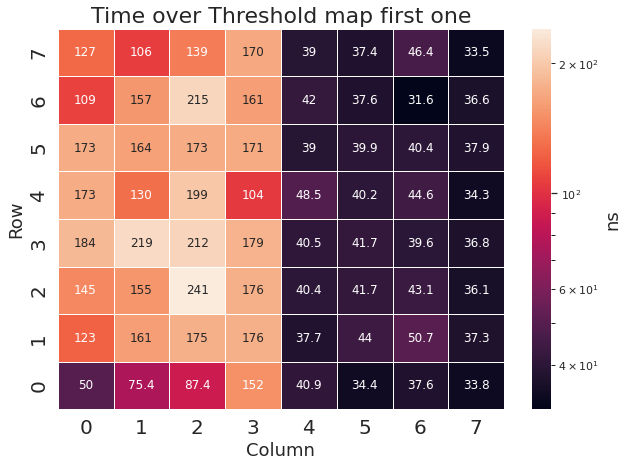

In [32]:
plt.figure(figsize = (10,7))
plt.title('Time over Threshold map first one',fontsize=22)
ax=sns.heatmap(totmap, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.ylabel("Row",fontsize=18)
plt.xlabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

In [19]:
totmap[0,3]
contot=[]
conres=[]
for i in range(4):
    for j in range(8):
        contot.append(totmap[j,i])
        conres.append(sigmap[j,i])

switchtot= []
switchres=[]
for i in range(4,8):
    for j in range(8):
        switchtot.append(totmap[j,i])
        switchres.append(sigmap[j,i])

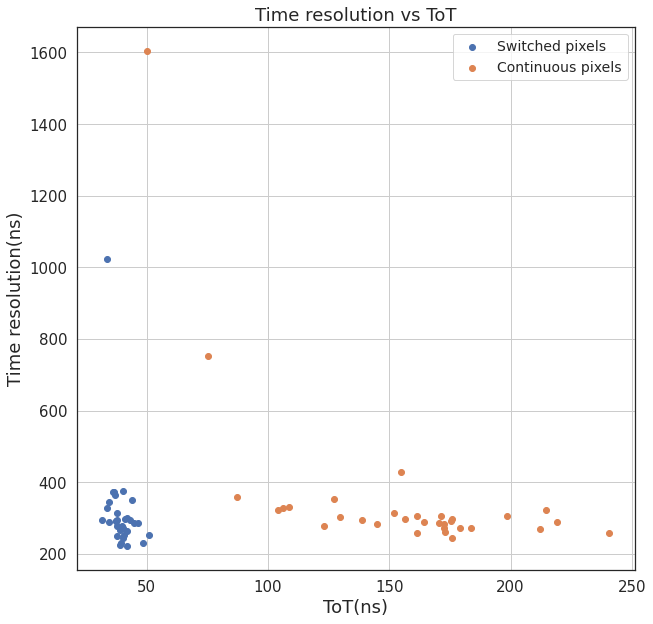

In [20]:
fig = plt.figure(figsize=(10,10))
plt.scatter(switchtot,switchres, label="Switched pixels")
plt.scatter(contot,conres, label="Continuous pixels")

plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Time resolution(ns)",fontsize=18)
plt.title("Time resolution vs ToT",fontsize=18)
plt.xlabel("ToT(ns)",fontsize=18)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=14)
plt.show()

In [21]:
timeres= conres

for i in range(len(switchres)):
    timeres.append(switchres[i])
    
    
totlist= contot

for i in range(len(switchtot)):
    totlist.append(switchtot[i])

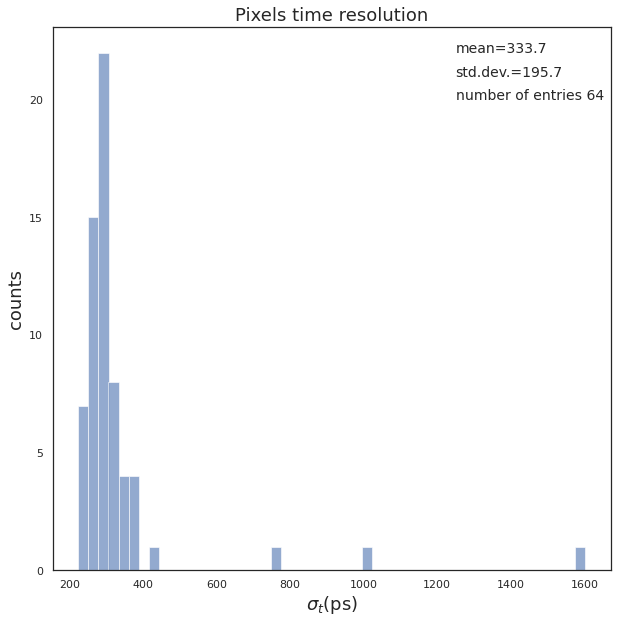

In [22]:
mean= np.mean(timeres)
std= np.std(timeres)
amount= len(timeres)
fig = plt.figure(figsize=(10,10))
plt.hist(timeres, bins=50, alpha=0.6, color='b')
plt.xlabel("$\sigma_t$(ps)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(1250,22),fontsize=14)
plt.annotate("std.dev.={:.1f}".format(std),xy=(1250,21),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(1250,20),fontsize=14)





plt.show()

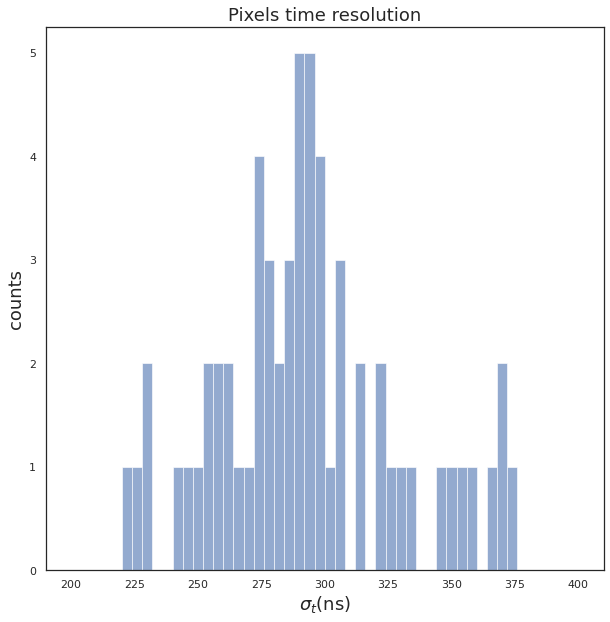

In [23]:
mean= np.mean(timeres)
std= np.std(timeres)
amount= len(timeres)
fig = plt.figure(figsize=(10,10))
plt.hist(timeres, bins=50, alpha=0.6, color='b',range=(200,400))
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(1250,22),fontsize=14)
plt.annotate("std={:.1f}".format(std),xy=(1250,21),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(1250,20),fontsize=14)





plt.show()



In [24]:
new=[]

for i in range(len(timeres)):
    if timeres[i]<400:
        new.append(timeres[i])
        
    

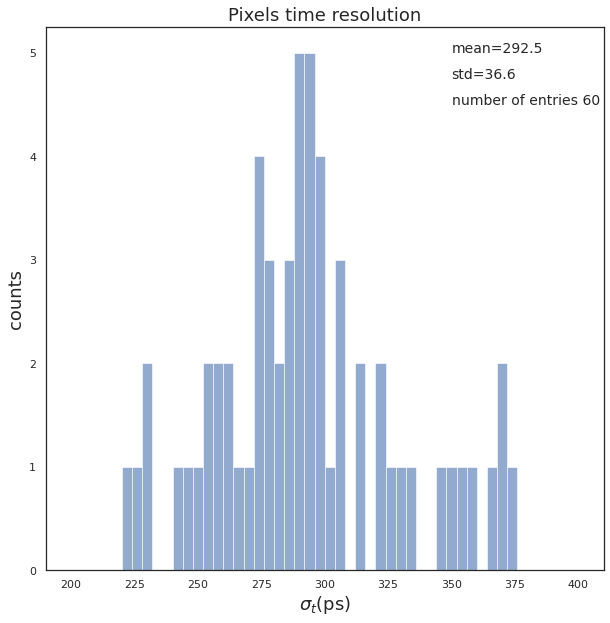

In [25]:
mean= np.mean(new)
std= np.std(new)
amount= len(new)
fig = plt.figure(figsize=(10,10))
plt.hist(new, bins=50, alpha=0.6, color='b',range=(200,400))
plt.xlabel("$\sigma_t$(ps)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(350,5),fontsize=14)
plt.annotate("std={:.1f}".format(std),xy=(350,4.75),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(350,4.5),fontsize=14)





plt.show()

In [26]:
np.std(new)

36.62497493970088

In [27]:
def q(tot):
    return (tot-36.10)/0.0084

In [28]:
charge=[]
for i in range(len(tot2)):
    ch= q(tot2[i])
    charge.append(ch)
    
chargemap= np.reshape(charge,(8,8))


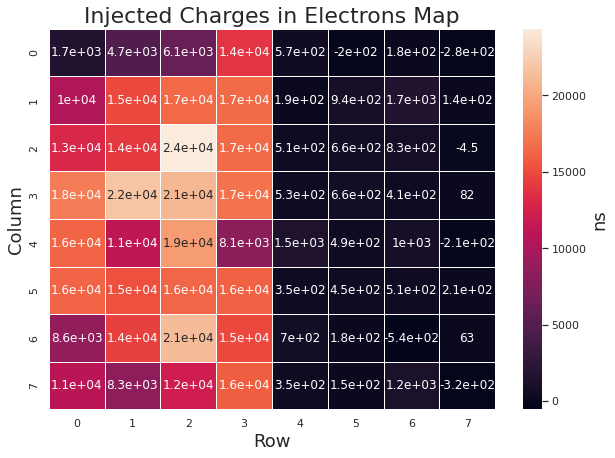

In [29]:
plt.figure(figsize = (10,7))
plt.title('Injected Charges in Electrons Map',fontsize=22)
ax=sns.heatmap(chargemap, linewidth=0.5,annot=True, fmt='.2g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

In [30]:
tot2[-1]

33.453763592007434

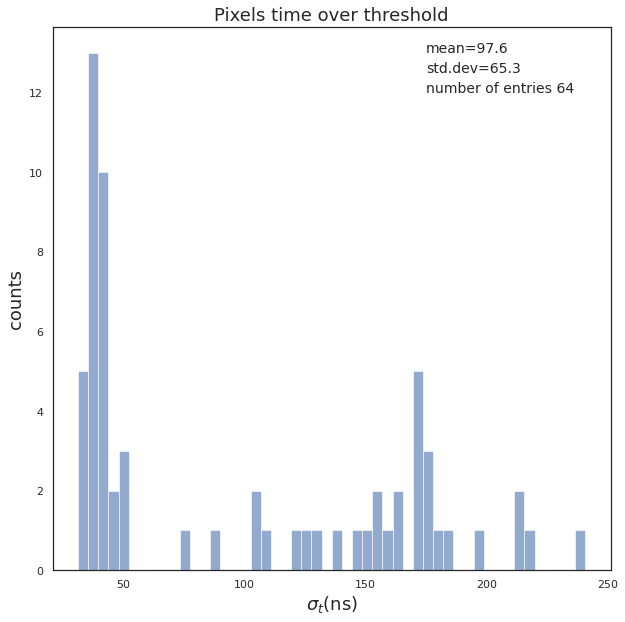

In [31]:
mean= np.mean(totlist)
std= np.std(totlist)
amount= len(totlist)
fig = plt.figure(figsize=(10,10))
plt.hist(totlist, bins=50, alpha=0.6, color='b')
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.ylabel("counts",fontsize=18)

plt.title("Pixels time over threshold",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.plot([],[],label="mean={:.1f}".format(mean))
plt.plot([],[],label="std={:.1f}".format(std))
plt.plot([],[],"" ,label="number of entries {:.1f}".format(amount))
plt.annotate("mean={:.1f}".format(mean),xy=(175,13),fontsize=14)
plt.annotate("std.dev={:.1f}".format(std),xy=(175,12.5),fontsize=14)
plt.annotate("number of entries {}".format(amount),xy=(175,12),fontsize=14)





plt.show()

In [47]:
det0= [i * 10**3 for i in test]


In [51]:
def Gaussian(x,a,b,c):
    return a * exp(-(x - b)**2.0 / (2 * c**2))

In [69]:
det00=[]
for i in range(len(test)):
    det00.append(test[i]-np.mean(test))


 Curve-fit Curve fit: [1.45876051e+02 7.75307341e-03 2.77337761e-01]

 Curve-fit Fit errors: [2.33290493 0.00512138 0.00512151]
5.121509689434382


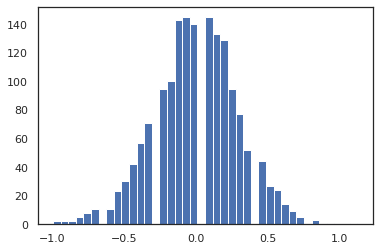

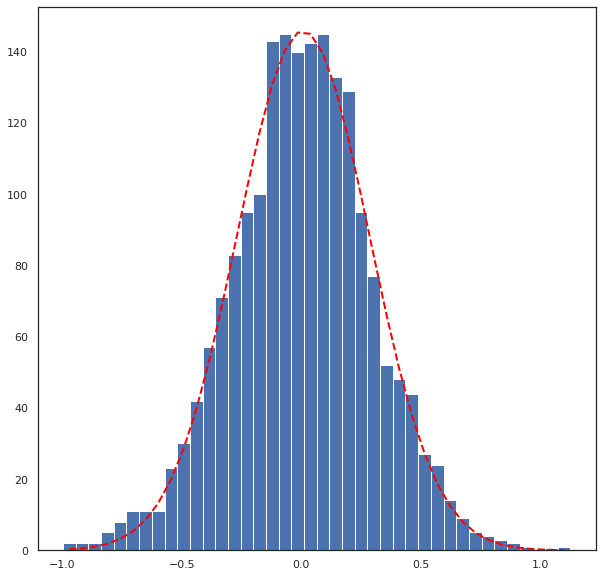

In [97]:
nbins=40
n,bins,patches = plt.hist(det00,bins=nbins)

fig = plt.figure(figsize=(10,10))

bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
num=nbins,endpoint=True)


y = n
y[y==0]= 1e-8

for i in range(len(n)):
    if n[i] ==1e-8:
        n[i]= (n[i-1]+n[i+1])/2






popt, pcov = optimize.curve_fit(Gaussian,x,n) 

# Curve-fit error method
error = [] 
for i in range(len(popt)):
    try:
      error.append( np.absolute(pcov[i][i])**0.5)
    except:
      error.append( 0.00 )
pfit_curvefit = popt
perr_curvefit = np.array(error) 
print('\n Curve-fit Curve fit: %s' % pfit_curvefit)
print('\n Curve-fit Fit errors: %s' % perr_curvefit)

# Plot the fit
x_fit = np.linspace(x[0], x[-1], nbins)
y_gauss = Gaussian(x_fit, *popt)
yerr=Gaussian(x_fit,*perr_curvefit)
plt.bar(x,n, width=bin_size)
plt.plot(x_fit, y_gauss,linestyle='--',linewidth=2,\
color='red',label='Gaussian')



print(perr_curvefit[2]*1000)

# fit test

In [103]:
len(y_gauss)

40

In [127]:
chi_square_test_statistic1 = 0
for i in range(len(n)):
    chi_square_test_statistic1 = chi_square_test_statistic1 + \
        (np.square(n[i]-y_gauss[i]))/y_gauss[i]
  
  
print('chi square value determined by formula : ' +
      str(chi_square_test_statistic1))
  
# find Chi-Square critical value
print(stats.chi2.ppf(1-0.05, df=39))

chi square value determined by formula : 69.31756304445412
54.572227758941736
